In [71]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
data = pd.read_csv(r'D:\college\ann project\intern\nba_2013.csv')
df = data.copy() # To keep the data as backup
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [73]:
print(data.shape)
data.info()

(481, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 no

In [74]:
data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [75]:
data.loc[:,['fg','fga']].mean()

fg     192.881497
fga    424.463617
dtype: float64

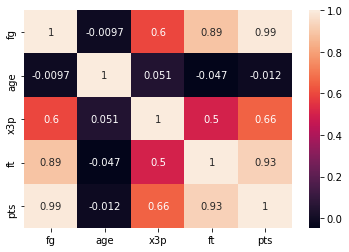

In [76]:
sns.heatmap(data[['fg','age','x3p','ft','pts']].corr(),annot= True)

In [130]:
# let us cluster the players using KMeans clustering method
from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters = 5,random_state = 41) #create the kmeans model with 5 clusters
num_columns = data._get_numeric_data().dropna(axis = 1) #get only numeric data from dataset and remove missing data
kmean_model.fit(num_columns) #train the model
labels = kmean_model.labels_  #get the labels
print(labels)

[0 0 0 4 0 2 4 0 3 3 3 2 3 3 1 0 3 4 2 0 1 2 0 0 1 2 0 2 2 2 3 3 1 3 2 1 3
 4 3 2 0 4 0 1 0 3 2 2 0 3 3 3 3 2 2 3 0 3 1 4 1 3 1 2 3 2 2 2 2 0 2 1 1 3
 1 2 2 0 0 0 1 3 2 1 1 4 3 1 3 1 2 2 0 2 2 3 2 1 3 4 2 4 2 2 1 1 0 3 2 2 4
 3 2 2 2 4 0 3 2 2 2 0 1 4 1 0 0 0 4 4 3 1 1 4 2 2 4 2 0 0 1 1 0 2 1 2 3 2
 3 3 1 2 2 0 1 0 0 0 1 1 4 0 4 1 3 2 2 2 2 2 1 4 0 2 3 3 1 4 0 4 2 0 2 0 3
 4 3 2 2 0 2 2 2 1 0 1 0 4 1 0 1 1 1 3 1 3 2 1 0 2 2 0 4 0 3 4 3 3 4 2 1 1
 2 2 2 4 2 2 2 4 1 2 4 0 1 0 0 4 2 1 2 2 0 2 1 1 0 0 1 2 3 3 0 4 1 3 2 2 0
 3 2 2 1 2 1 4 2 1 2 0 0 2 4 1 3 0 1 4 4 2 3 0 1 3 0 0 1 2 4 2 2 3 0 0 2 2
 1 1 1 2 1 0 0 0 3 0 3 4 2 2 4 3 2 3 1 3 0 2 3 2 2 2 2 2 2 2 0 2 1 0 4 2 4
 2 0 0 2 1 3 2 2 0 3 2 1 4 3 1 1 0 1 2 3 1 2 2 2 0 2 2 0 3 2 2 2 4 0 2 0 3
 2 3 0 0 0 2 1 1 2 0 3 0 0 3 3 3 0 1 2 2 3 0 0 1 2 2 2 2 2 0 1 0 4 0 2 0 3
 2 4 0 2 3 1 1 0 2 4 2 3 0 2 2 2 4 2 2 3 3 4 1 3 2 0 1 0 2 4 2 0 0 1 3 2 3
 0 2 1 2 1 1 4 4 3 2 0 2 2 1 4 3 2 2 1 3 0 3 3 3 2 0 0 3 2 0 2 0 1 1 4 3 0]


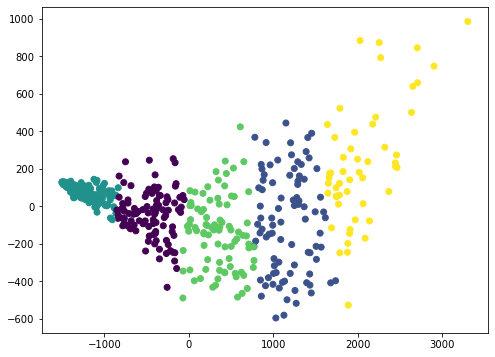

In [131]:

plt.figure(figsize=(8,6))
from sklearn.decomposition import PCA
pca = PCA(2)
plot_pca = pca.fit_transform(num_columns)
plt.scatter(x= plot_pca[:,0], y = plot_pca[:,1],c= labels)
plt.show()

In [132]:
LeBron = num_columns.loc[data['player']=='LeBron James',:] 
#Find player Kevin Durant
KD = num_columns.loc[data['player']=='Kevin Durant',:]
KD

,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
133,25,81,81,3122,849,1688,192,491,657,1197,...,58,540,598,445,103,59,285,174,2593,2013


In [133]:
LeBron_list = LeBron.values.tolist() # kmeans model needs a list value and hence we changed it to list.
Kevin_list = KD.values.tolist()

In [135]:
print(kmean_model.predict(LeBron_list)) 
print(kmean_model.predict(Kevin_list))

[4]
[4]


In [136]:

cluster_map = pd.DataFrame() # a new dataframe
cluster_map['player_name'] = data.player.values # get the vlaues of players and add them to the dataframe
cluster_map['cluster_no.'] = labels #we add the clusters column to display 
cluster_map[cluster_map['cluster_no.'] == 4] ##displays the player of each cluster input

,player_name,cluster_no.
3,Arron Afflalo,4
6,LaMarcus Aldridge,4
17,Carmelo Anthony,4
37,Nicolas Batum,4
41,Bradley Beal,4
59,Chris Bosh,4
85,Michael Carter-Williams,4
99,Mike Conley,4
101,DeMarcus Cousins,4
110,Stephen Curry,4


In [137]:
from sklearn.decomposition import PCA
pca = PCA(2)
plot_columns = pca.fit_transform(num_columns)

In [138]:
data.drop(['pos','season','season_end','bref_team_id'],axis=1,inplace =True)

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  481 non-null    object 
 1   age     481 non-null    int64  
 2   g       481 non-null    int64  
 3   gs      481 non-null    int64  
 4   mp      481 non-null    int64  
 5   fg      481 non-null    int64  
 6   fga     481 non-null    int64  
 7   fg.     479 non-null    float64
 8   x3p     481 non-null    int64  
 9   x3pa    481 non-null    int64  
 10  x3p.    414 non-null    float64
 11  x2p     481 non-null    int64  
 12  x2pa    481 non-null    int64  
 13  x2p.    478 non-null    float64
 14  efg.    479 non-null    float64
 15  ft      481 non-null    int64  
 16  fta     481 non-null    int64  
 17  ft.     461 non-null    float64
 18  orb     481 non-null    int64  
 19  drb     481 non-null    int64  
 20  trb     481 non-null    int64  
 21  ast     481 non-null    int64  
 22  st

In [141]:
new.describe()


,fta,fga,x3pa,pts
count,481.000000,481.000000,481.000000,481.000000
mean,120.642412,424.463617,110.130977,516.582121
std,131.240639,368.850833,132.751732,470.422228
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,110.000000,3.000000,115.000000
50%,73.000000,332.000000,48.000000,401.000000
75%,179.000000,672.000000,193.000000,821.000000
max,805.000000,1688.000000,615.000000,2593.000000


In [142]:

dummies = pd.get_dummies(new.player)
dummies.head(3)

,A.J. Price,Aaron Brooks,Aaron Gray,Adonis Thomas,Al Harrington,Al Horford,Al Jefferson,Al-Farouq Aminu,Alan Anderson,Alec Burks,...,Wayne Ellington,Wesley Johnson,Wesley Matthews,Will Barton,Will Bynum,Willie Green,Wilson Chandler,Xavier Henry,Zach Randolph,Zaza Pachulia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
data1 = pd.concat([dummies,new],axis = 1)

data1.drop(['player'],axis = 1,inplace =True)

X = data1.drop(['pts'],axis = 1)
y = data1['pts']

In [144]:
print(X.shape)
print(y.shape)

(481, 484)
(481,)


In [145]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

y_test = y_test[:,np.newaxis]
y_train = y_train[:,np.newaxis]

y_train.shape

(384, 1)

In [147]:

from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [148]:

Lr.score(X_test,y_test)


0.9905932319277106

In [149]:

def predict_points(player,fta,fga,x3pa):    
    loc_index = np.where(X.columns==player)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = fta
    x[1] = fga
    x[2] = x3pa
    if loc_index >= 0:
        x[loc_index] = 1

    return round(Lr.predict([x])[0][0])



In [150]:
predict_points('Kevin Durant',1010,136,300)


4236.0

In [151]:
# the points LBJ would score if he took 1011 free throws, 136 field goals attempt and 300 3 pointer shots
predict_points('LeBron James',1011,136,300)

4288.0